## Problema 1: Regressão - Prevendo o Percentual de Gordura

### Descrição do Desafio:

Prever o percentual de gordura de um indivíduo é um desafio complexo em análise corporal e saúde. Isso ocorre porque o percentual de gordura é influenciado por vários fatores, como a composição corporal, o metabolismo, a idade, o gênero e o nível de atividade física. Além disso, existem diferentes métodos para medir o percentual de gordura, como impedância bioelétrica, dobras cutâneas e medições de densidade corporal, cada um com suas próprias limitações e precisão. Portanto, criar um modelo preciso e robusto que leve em conta essas variáveis ​​e técnicas de medição é essencial para obter resultados confiáveis ​​na predição do percentual de gordura e auxiliar em avaliações de saúde e bem-estar.

In [ ]:
! pip install kaggle

In [7]:
import os
os.environ['KAGGLE_USERNAME'] = 'gabrielamazonas'
os.environ['KAGGLE_KEY'] = 'mysecretkey'

In [8]:
! kaggle datasets download -d fedesoriano/body-fat-prediction-dataset

  0% 0.00/7.43k [00:00<?, ?B/s]
100% 7.43k/7.43k [00:00<00:00, 11.9MB/s]


In [9]:
! unzip body-fat-prediction-dataset.zip

Archive:  body-fat-prediction-dataset.zip
  inflating: bodyfat.csv             


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("bodyfat.csv")
data

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


Este é o nosso conjunto de dados de treinamento, consistindo de 15 colunas e 252 linhas, totalizando 3.780 valores.

|        Dados       | Descrição                                                                           |       Proporcionalidade       |
|:------------------:|:-----------------------------------------------------------------------------------:|:-----------------------------:|
|       𝐷𝑒𝑛𝑠𝑖𝑡𝑦      | Quantidade de massa por unidade de volume de uma substância                           | Diretamente Proporcional      |
|        𝐴𝑔𝑒         | Tempo de existência de uma pessoa ou organismo desde o nascimento ou criação         | Diretamente Proporcional      |
|       𝑊𝑒𝑖𝑔ℎ𝑡       | Quantidade de força exercida sobre um objeto devido à gravidade                      | Diretamente Proporcional      |
|       𝐻𝑒𝑖𝑔ℎ𝑡       | Medida de quão alto ou alto é algo                                                   | Diretamente Proporcional      |
|        𝑁𝑒𝑐𝑘         | Medida da circunferência do pescoço                                                  | Diretamente Proporcional      |
|        𝐶ℎ𝑒𝑠𝑡        | Medida do peito em seu ponto mais largo                                              | Diretamente Proporcional      |
|      𝐴𝑏𝑑𝑜𝑚𝑒𝑛       | Medida em torno da parte mais larga do abdômen                                       | Diretamente Proporcional      |
|         𝐻𝑖𝑝         | Medida em torno da parte mais larga dos quadris                                      | Diretamente Proporcional      |
|        𝑇ℎ𝑖𝑔ℎ         | Medida da circunferência da coxa                                                     | Inversamente Proporcional     |
|        𝐾𝑛𝑒𝑒         | Medida tirada ao redor da articulação do joelho em seu ponto mais largo               | Diretamente Proporcional      |
|       𝐵𝑖𝑐𝑒𝑝𝑠        | Medida da circunferência do braço superior                                           | Diretamente Proporcional      |
|      𝐹𝑜𝑟𝑒𝑎𝑟𝑚       | Medida em torno da parte mais larga do antebraço                                     | Diretamente Proporcional      |
|       𝑊𝑟𝑖𝑠𝑡        | Medida da circunferência do pulso                                                    | Diretamente Proporcional      |




### Análise Exploratória de Dados

Da documentação do Dataset:

Atributos e Unidades:

The variables listed below, from left to right, are:

Density determined from underwater weighing
Percent body fat from Siri's (1956) equation

Age (years)

Weight (lbs)

Height (inches)

Neck circumference (cm)

Chest circumference (cm)

Abdomen 2 circumference (cm)

Hip circumference (cm)

Thigh circumference (cm)

Knee circumference (cm)

Ankle circumference (cm)

Biceps (extended) circumference (cm)

Forearm circumference (cm)

Wrist circumference (cm)

#### Matriz de Correlação

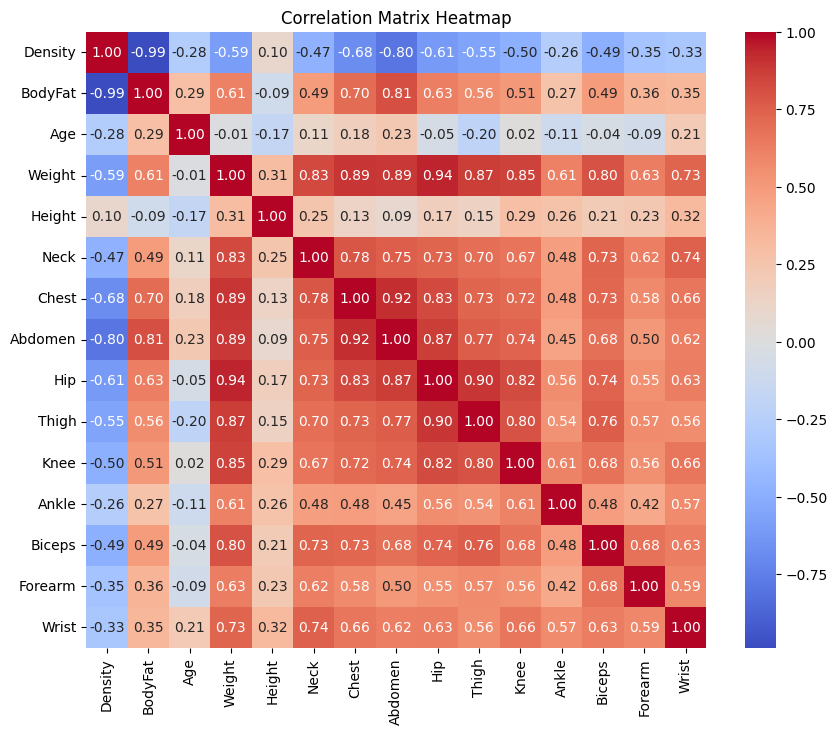

In [22]:
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

- Observações sobre a Matriz de Correlação:

- O Atributo alvo da regreção, BodyFat, possui alta co-relação com o atributo Density, no sentido negativo, ou seja, Quanto maior a Density, menor o BodyFat e vice-versa, na distribuição de dados do dataset.
- BodyFat e Density possuem suas corelações com os demais atributos similares, porém no sentido inverso. Ex.: o Atributo Age possui uma co-relação positiva de 0.29 com o atributo BodyFat e uma co-relação negativa de 0.28 com Density

#### Density ( Densidade )




A pesagem subaquática é um método de medição da densidade corporal, que é então usado para estimar a porcentagem de gordura corporal. O princípio por trás da pesagem subaquática é que a gordura é menos densa que a água, então as pessoas com uma porcentagem maior de gordura corporal serão menos flutuantes e pesarão menos embaixo d'água.

<Axes: xlabel='Density', ylabel='Count'>

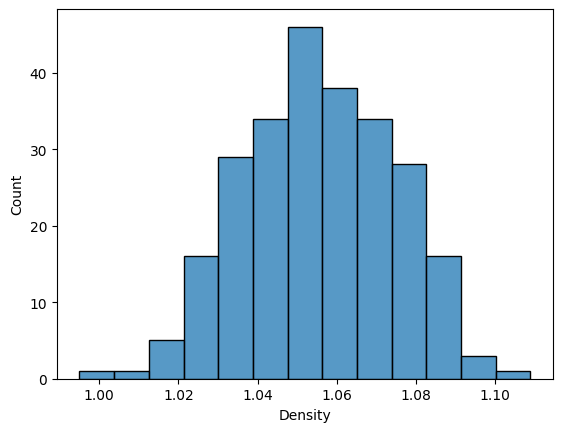

In [25]:
sns.histplot(data["Density"])

#### Age ( Idade )


A idade pode ter co-relação com a elevação do percentual de gordura nos indivíduos.
Na matriz de co-relação, observamos que esta não é um dos atributos que mais influenciam na predição do percentual de gordura (BodyFat)

<Axes: xlabel='Age', ylabel='Count'>

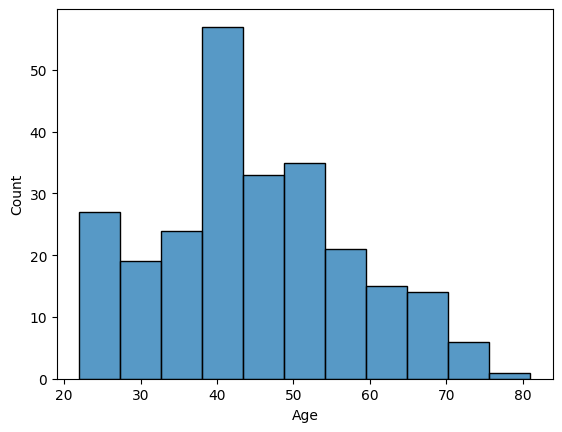

In [26]:
sns.histplot(data["Age"])

#### Weight (Peso) - Unidade: lbs

Intuitivamente, entende-se que pessoas com sobrebepeso possuem um percentual de gordura mais alto. No entanto, o mesmo pode não ser verdade ao considerar indivíduos com grande percentual de massa muscular, por exemplo.

<Axes: xlabel='Weight', ylabel='Count'>

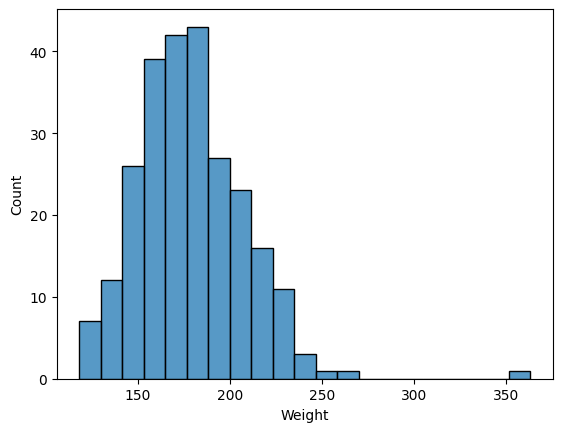

In [27]:
sns.histplot(data["Weight"])

Analisando o histograma do atributo Weight, notamos um outlier em nosso conjunto de dados. Em seguida, tratamos o outlier e calculamos novamente o historgrama

In [33]:
# Substituímos o valor do outlier pela média dos pesos do dataset (mean).
data["Weight"] = np.where(data["Weight"] > 250 , data["Weight"].mean() , data["Weight"])

#### Height (Altura) - Unidade: Inches

Baseado no dataset e na matriz de correlação, a altura do indivíduo é um dos atributos com menor correlação com o atributo BodyFat (-0.09)

<Axes: xlabel='Height', ylabel='Count'>

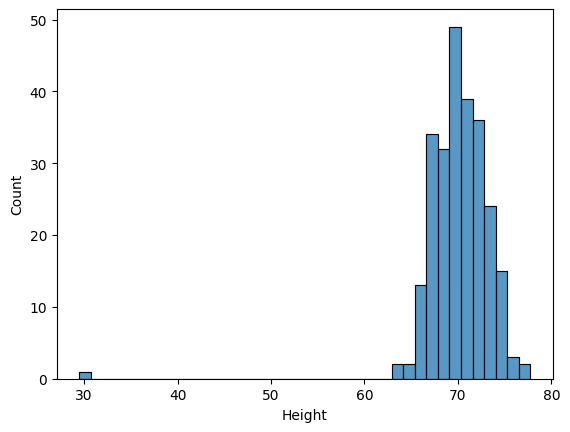

In [16]:
sns.histplot(data["Height"])

Analisando o histograma do atributo Height, notamos um outlier em nosso conjunto de dados. Em seguida, tratamos o outlier e calculamos novamente o historgrama

In [17]:
# Substituindo o valor da altura outlier pela média do conjunto de dados
data["Height"] = np.where(data["Height"] < 30 , data["Height"].mean() , data["Height"])

#### Neck (Pescoço) - Unidade: cm

A circunferência do pescoço, em cm. Pode estar co-relacionada com sobrepeso e maior percentual de gordura.

<Axes: xlabel='Neck', ylabel='Count'>

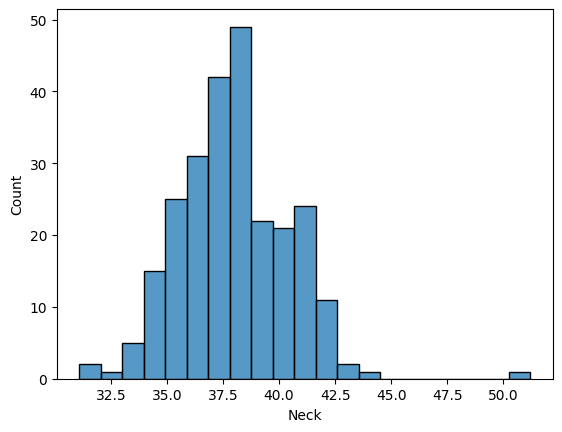

In [38]:
sns.histplot(data["Neck"])

In [40]:
# Substituindo os valores outliers de circunferência do pescoço pela média do conjunto de dados
data["Neck"] = np.where(data["Neck"] < 32.5, data["Neck"].mean() , data["Neck"])
data["Neck"] = np.where(data["Neck"] > 45, data["Neck"].mean() , data["Neck"])

#### Chest (Busto) - Unidade: cm

Teoricamente, uma maior circunferência de busto pode estar associada à maior percentual de gordura.

<Axes: >

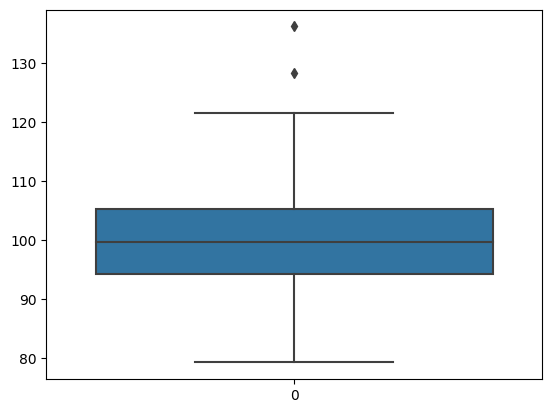

In [42]:
sns.boxplot(data["Chest"])

É possível observar dois outliers desse atributo em nosso conjunto de dados, que trataremos a seguir:

In [43]:
data["Chest"] = np.where(data["Chest"] > 125 , data["Chest"].mean() , data["Chest"])

#### Abdomen - Unidade: cm

<Axes: >

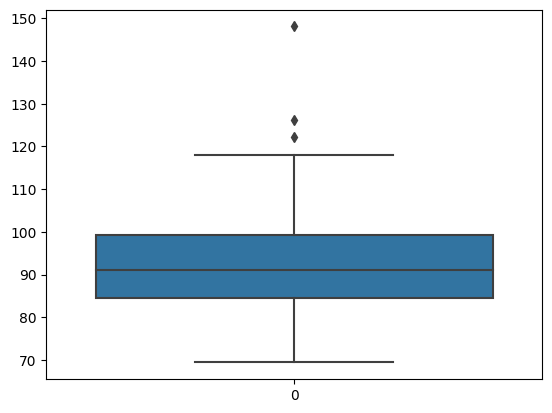

In [49]:
sns.boxplot(data["Abdomen"])

Notamos alguns outliers (3) além do quartil superior (75%) , que trataremos a seguir:

In [50]:
data["Abdomen"] = np.where(data["Abdomen"] > 120 , data["Abdomen"].mean() , data["Abdomen"])

#### Hip (Quadril) - Unidade: cm

<Axes: >

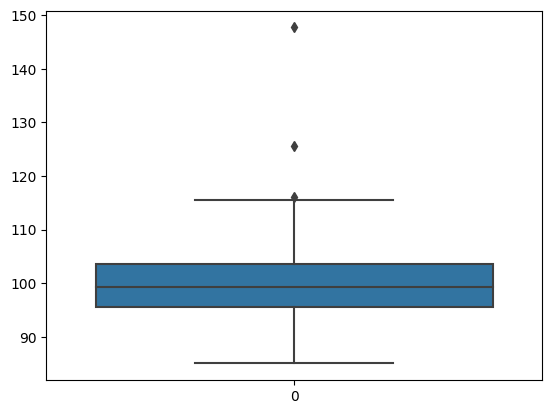

In [55]:
sns.boxplot(data["Hip"])

In [56]:
data["Hip"] = np.where(data["Hip"] > 115 , data["Hip"].mean() , data["Hip"])

#### Thigh (Coxa) - Unidade: cm

<Axes: >

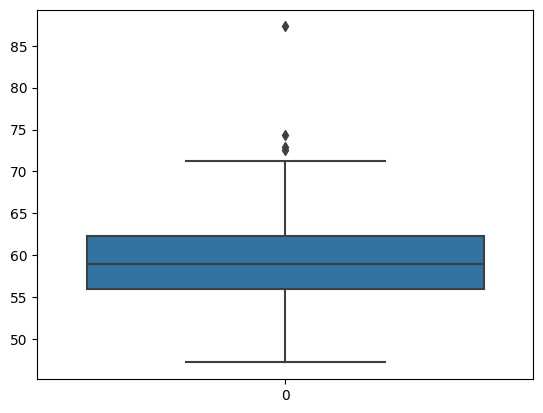

In [58]:
sns.boxplot(data["Thigh"])

In [59]:
data["Thigh"] = np.where(data["Thigh"] > 72 , data["Thigh"].mean() , data["Thigh"])

#### Kneee (Joelho) - Unidade: cm

<Axes: >

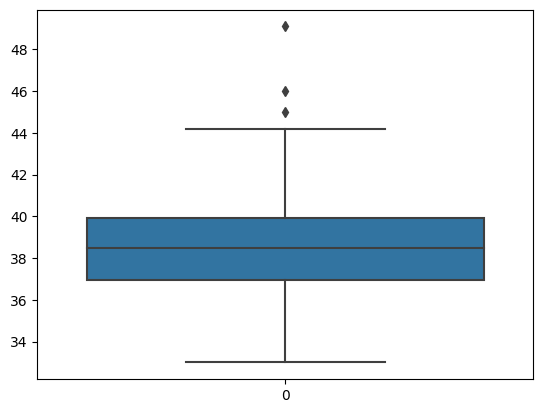

In [11]:
sns.boxplot(data["Knee"])

In [12]:
data["Knee"] = np.where(data["Knee"] > 44 , data["Knee"].mean() , data["Knee"])

#### Biceps - Unidade: cm

<Axes: >

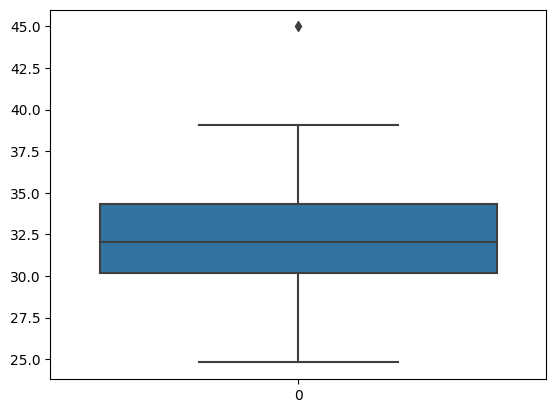

In [14]:
sns.boxplot(data["Biceps"])

In [15]:
data["Biceps"] = np.where(data["Biceps"] > 40 , data["Biceps"].mean() , data["Biceps"])

#### Forearm (Antebraço) - Unidade: cm

<Axes: >

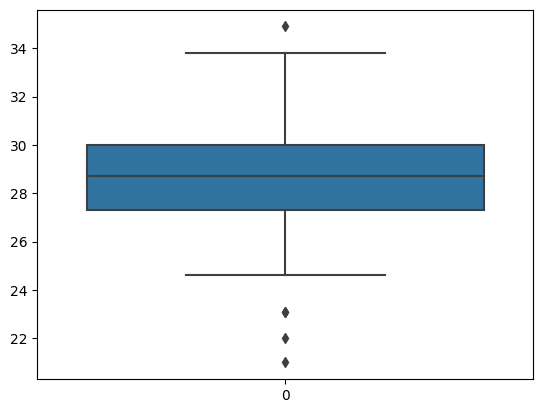

In [19]:
sns.boxplot(data["Forearm"])

In [20]:
data["Forearm"] = np.where(data["Forearm"] > 34 , data["Forearm"].mean() , data["Forearm"])
data["Forearm"] = np.where(data["Forearm"] < 25 , data["Forearm"].mean() , data["Forearm"])

#### Wrist (Pulso) - Unidade: cm

<Axes: >

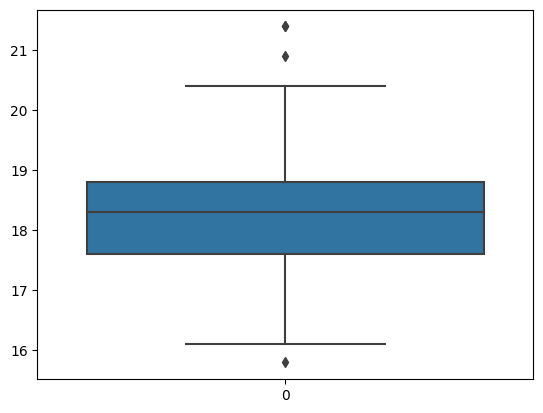

In [21]:
sns.boxplot(data["Wrist"])

In [22]:
data["Wrist"] = np.where(data["Wrist"] > 20.5 , data["Wrist"].mean() , data["Wrist"])
data["Wrist"] = np.where(data["Wrist"] < 16 , data["Wrist"].mean() , data["Wrist"])

### Preparação dos Dados






#### Separação entre Treino e Teste





In [28]:
# Utilizamos a função numpy .split, para separar o dataset em dados de treino e de teste
train , test = np.split(data.sample(frac = 1) , [int(0.8 * len(data))])

In [29]:
# Criamos a função pre_process, onde removemos a variável target do nosso data frame e separamos em:
# x: dataframe com todos os atributos, exceto a variável target BodyFat
# y: dataframe apenas com a variável target do conjunto de dados
def pre_process(dataframe):
    x = dataframe.drop("BodyFat" , axis = 1)
    y = dataframe["BodyFat"]

    return x , y

In [30]:
X_train , Y_train = pre_process(train)
X_test , Y_test = pre_process(test)

In [ ]:
####

### Construção do Modelo Preditivo

#### LinearRegressor



Esta é uma implementação padrão da regressão linear por mínimos quadrados ordinários. Ela ajusta um modelo linear minimizando a soma dos quadrados dos resíduos entre os valores observados e previstos.


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Definição do R2 Score:

É também conhecida como coeficiente de determinação ou R-squared.

Em termos simples, o R2 score mede a proporção da variância da variável dependente (a saída do modelo) que pode ser explicada pelas variáveis independentes (as entradas do modelo). Essa métrica fornece uma medida de quão bem o modelo de regressão se ajusta aos dados.

O valor do R2 score varia entre 0 e 1:

Um R2 score de 1 indica um ajuste perfeito, onde o modelo explica toda a variabilidade dos dados e a linha de regressão se ajusta exatamente aos pontos observados.
Um R2 score de 0 indica que o modelo não é melhor do que prever a média dos valores da variável dependente. Nesse caso, a linha de regressão é basicamente uma reta horizontal no nível da média dos dados.
Valores negativos do R2 score são possíveis quando o modelo é muito pior do que prever a média, e a regressão ajustada é muito pior do que uma reta horizontal.

In [83]:
LR = LinearRegression()
LR.fit(X_train , Y_train)

linear_r2_score = r2_score(Y_test , LR.predict(X_test))
linear_r2_score

0.9948208638064479

### Lasso


A regressão Lasso é uma variante da regressão linear que adiciona regularização L1. Assim como a Ridge, ela auxilia na seleção de características ao fazer com que alguns coeficientes se tornem exatamente zero.

In [75]:
from sklearn.linear_model import Lasso

In [78]:
lasso = Lasso()
lasso.fit(X_train , Y_train)

lasso_prediction = lasso.predict(X_test)
lasso_r2_score = r2_score(Y_test , lasso_prediction)
lasso_r2_score

0.7496303929160372

### Ridge


A regressão Ridge é uma variante da regressão linear que adiciona regularização L2 ao modelo. Ela ajuda a prevenir o overfitting penalizando os valores grandes dos coeficientes.

In [80]:
from sklearn.linear_model import Ridge

In [81]:
ridge = Ridge()
ridge.fit(X_train , Y_train)

ridge_prediction = ridge.predict(X_test)
ridge_r2_score = r2_score(Y_test , ridge_prediction)
ridge_r2_score

0.768942323090175

#### Resultado da Comparação entre Modelos: LinearRegressor

Baseado no score r2, optamos pela utilização do modelo LinearRegressor com parâmetros default para a predição da variável target BodyFat. A pontuação r2_score com este modelo foi de 0.9948208638064479, valor próximo de 1, indicando um bom ajuste do modelo aos dados de treinamento durante a realização dos testes

## Problema 2: Deep Learning - Visão Computacional

### Classificando Imagens de Esportes

Classificar imagens em seus respectivos esportes é um desafio complexo em visão computacional. Isso ocorre devido à grande variação nas imagens de diferentes esportes, que podem apresentar cenários, ângulos e condições de iluminação distintas. Além disso, alguns esportes podem ter características visuais semelhantes, o que torna a distinção entre classes ainda mais difícil. O problema é agravado pela presença de ruídos, oclusões e variações intraclasse. Para superar esses obstáculos, é necessário desenvolver modelos de aprendizado profundo robustos e eficientes, capazes de extrair características relevantes e representativas das imagens para realizar uma classificação precisa. A coleta de um conjunto de dados representativo e bem anotado também é essencial para treinar um modelo que possa generalizar adequadamente para novas imagens e realizar uma classificação acurada em diferentes esportes.

Kaggle Dataset Download

In [88]:
! kaggle competitions download -c logical-rythm-2k20-sports-image-classification

100% 427M/429M [00:18<00:00, 29.9MB/s]
100% 429M/429M [00:18<00:00, 23.8MB/s]


In [90]:
! unzip logical-rythm-2k20-sports-image-classification.zip -d inputs

Streaming output truncated to the last 5000 lines.
  inflating: inputs/train/train/55.jpg  
  inflating: inputs/train/train/550.jpg  
  inflating: inputs/train/train/5500.jpg  
  inflating: inputs/train/train/5501.jpg  
  inflating: inputs/train/train/5502.jpg  
  inflating: inputs/train/train/5503.jpg  
  inflating: inputs/train/train/5504.jpg  
  inflating: inputs/train/train/5505.jpg  
  inflating: inputs/train/train/5506.jpg  
  inflating: inputs/train/train/5507.jpg  
  inflating: inputs/train/train/5508.jpg  
  inflating: inputs/train/train/5509.jpg  
  inflating: inputs/train/train/551.jpg  
  inflating: inputs/train/train/5510.jpg  
  inflating: inputs/train/train/5511.jpg  
  inflating: inputs/train/train/5512.jpg  
  inflating: inputs/train/train/5513.jpg  
  inflating: inputs/train/train/5514.jpg  
  inflating: inputs/train/train/5515.jpg  
  inflating: inputs/train/train/5516.jpg  
  inflating: inputs/train/train/5517.jpg  
  inflating: inputs/train/train/5518.jpg  
  infla

### Bibliotecas utilizadas:

In [91]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        pass
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [92]:
import os, shutil
from pathlib import Path

In [96]:
os.listdir('inputs')

['train_labels.csv',
 'test',
 'test_images_list.csv',
 'sample_submission.csv',
 'train']

In [97]:
original_base_dir = 'inputs'

#### Preparação dos Dados - Separação em Treino e Validação

In [143]:
import pandas as pd
import numpy as np
import tensorflow


# handle os specific
import os

# randomization
import random

# visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

# consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = 17,7
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8
rcParams['axes.titlesize'] = 16

# ignore deprecated and future warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [117]:

# set the path
ROOT_DIR = '.'
FILE_PATH = os.path.join(ROOT_DIR,'inputs')

# LIST DIRCTORIES INSIDE THE FILE PATH
os.listdir(FILE_PATH)

['train_labels.csv',
 'test',
 'test_images_list.csv',
 'sample_submission.csv',
 'train']

In [120]:
# SET THE TRAINING AND THE TEST PATH
TRAIN_PATH = os.path.join(FILE_PATH,'train')
TEST_PATH = os.path.join(FILE_PATH,'test')

os.listdir(TRAIN_PATH)
os.listdir(TEST_PATH)

TRAIN_IMAGES = os.path.join(TRAIN_PATH,'train')
TEST_IMAGES = os.path.join(TEST_PATH,'test')

print(len(os.listdir(TRAIN_IMAGES)))
print(len(os.listdir(TEST_IMAGES)))

11040
2760


In [121]:
# READ THE TRAIN csv FILE CONTAINING THE SPORTS LABEL
train_df = pd.read_csv(os.path.join(FILE_PATH,'train_labels.csv'))

In [122]:
# READ THE test csv FILE
test_df = pd.read_csv(os.path.join(FILE_PATH,'test_images_list.csv'))
test_df.tail()

,image
2755,./test/2755.jpg
2756,./test/2756.jpg
2757,./test/2757.jpg
2758,./test/2758.jpg
2759,./test/2759.jpg


In [123]:
# LIST THE FIRST FEW ROWS
train_df.head(10)

,image,sports
0,./train/0.jpg,baseball
1,./train/1.jpg,formula1
2,./train/2.jpg,fencing
3,./train/3.jpg,motogp
4,./train/4.jpg,ice_hockey
5,./train/5.jpg,wrestling
6,./train/6.jpg,motogp
7,./train/7.jpg,boxing
8,./train/8.jpg,volleyball
9,./train/9.jpg,volleyball


In [124]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11040 entries, 0 to 11039
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   11040 non-null  object
 1   sports  11040 non-null  object
dtypes: object(2)
memory usage: 172.6+ KB


Resumo com base na organização do diretório de dados As imagens são organizadas nos diretórios de treinamento e teste. Todas as imagens de treinamento estão no mesmo diretório e não em diretórios de suas respectivas classes. Existem 22 esportes cobertos pelas várias imagens. O DataFrame contém o nome completo do arquivo com a extensão. Há mais de 11.000 imagens na pasta de treinamento e aproximadamente 2.700 imagens na pasta de teste. Consideração Importante

Posteriormente, utilizaremos o aumento de dados usando a classe ImageDataGenerator no Keras. Em vez de usar flow_from_directory, será necessário usar flow_from_dataframe.

Data Exploration
Display images and corresponding labels
Check whether the data balanced --- > total image representation of various sports
Image sizes -- > to determine the input shape later in the model
Variation in a particular sport's images

In [125]:
# Extract the unique labels
sports_labels = train_df['sports'].unique()

# LIST THE SPORTS NAME INCLUDED IN THE DATASET
sports_labels

array(['baseball', 'formula1', 'fencing', 'motogp', 'ice_hockey', 'wrestling', 'boxing', 'volleyball', 'cricket',
       'basketball', 'wwe', 'swimming', 'weight_lifting', 'gymnastics', 'tennis', 'kabaddi', 'badminton', 'football',
       'table_tennis', 'hockey', 'shooting', 'chess'], dtype=object)

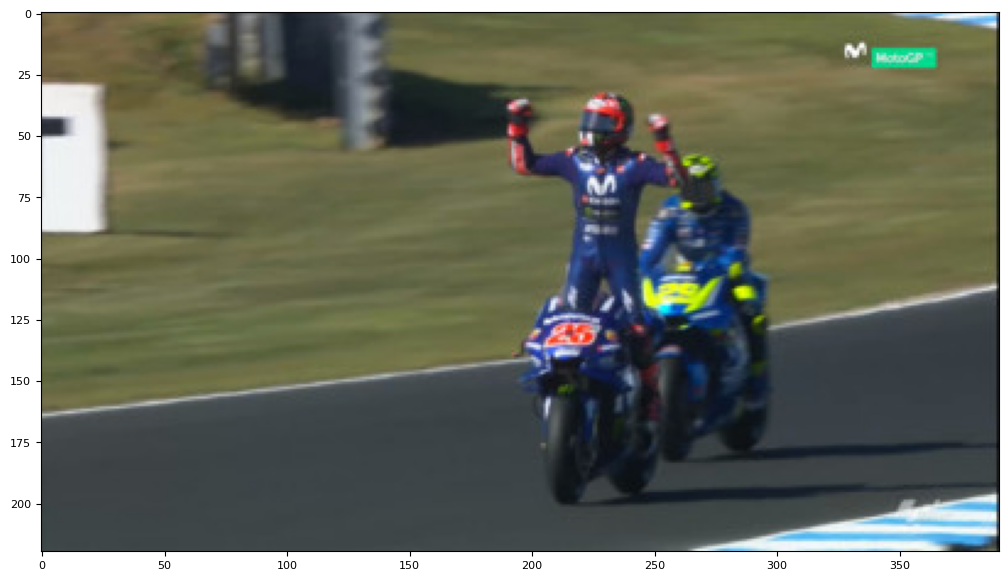

In [129]:
# CHECK ONE OF THE IMAGES -- > LETS PICK THE FIRST IN THE LIST
plt.imshow(imread(os.path.join(TRAIN_IMAGES,'13.jpg')));

In [130]:
# CHECK THE CLASS NAME OF THE DISPLAYED SPORT
train_df['sports'][13]

'motogp'

In [131]:
# IMAGE COUNT PER SPORT
train_df['sports'].value_counts()

badminton         698
football          611
volleyball        565
ice_hockey        559
baseball          555
tennis            555
boxing            542
formula1          539
gymnastics        531
swimming          531
table_tennis      530
motogp            513
wwe               508
cricket           501
fencing           494
weight_lifting    450
wrestling         432
shooting          417
hockey            405
basketball        375
chess             375
kabaddi           354
Name: sports, dtype: int64

<ipython-input-133-70217030c47f>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train_df['sports'], palette='viridis')


<Axes: xlabel='sports', ylabel='Count'>

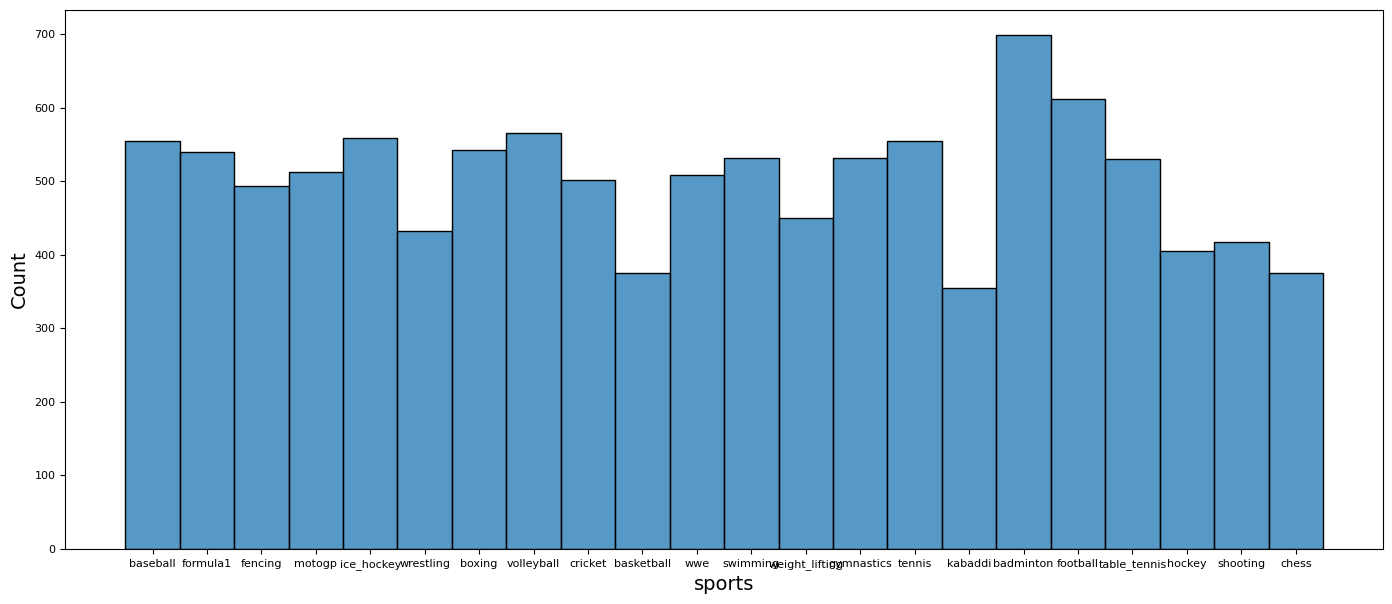

In [133]:
# VISUALIZE IMAGE COUNT PER SPORT
sns.histplot(train_df['sports'])

In [138]:
# PICK A RANDOM SPORTS
x = random.randint(0, (len(train_df['sports'].unique() ) - 1))
random_sport = sports_labels[x]

sports_show = train_df[train_df['sports']==random_sport]
print(f'The selected sport to display various images is {random_sport.upper()}')
sports_show.head()

The selected sport to display various images is CRICKET


,image,sports
10,./train/10.jpg,cricket
29,./train/29.jpg,cricket
101,./train/101.jpg,cricket
108,./train/108.jpg,cricket
122,./train/122.jpg,cricket


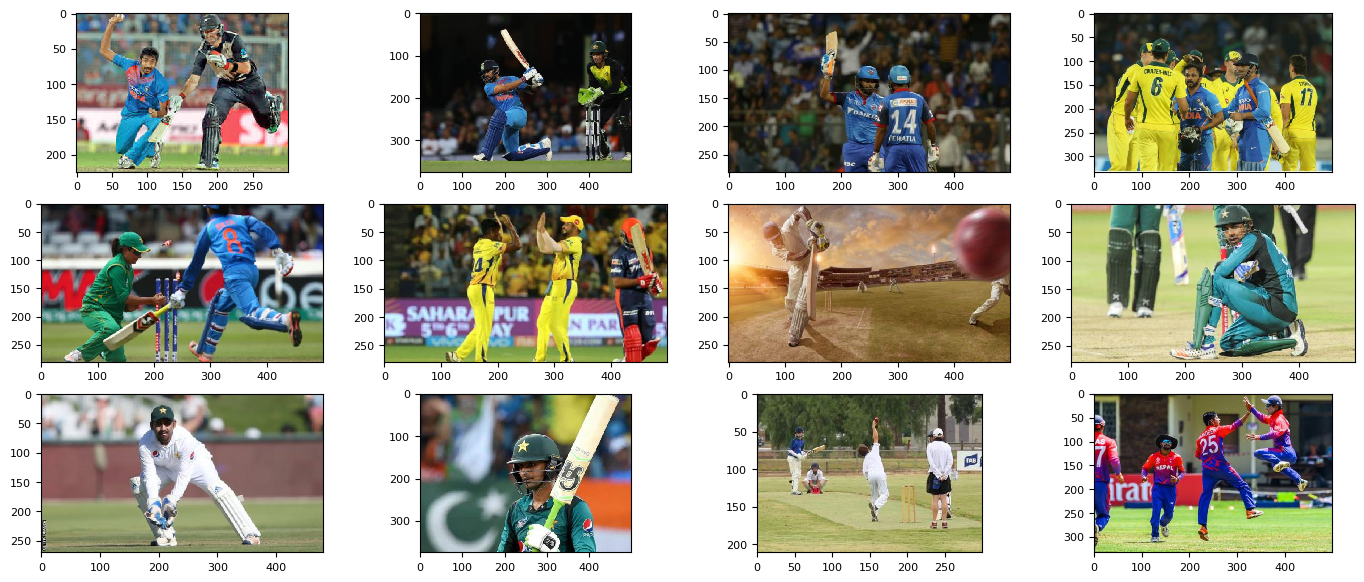

In [139]:
# DISPLAY THE SPORTS IMAGES --- > NOTICE THE VARIATION IN THE IMAGES OF THE SAME SPORT
n_rows = 3
n_cols = 4

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows,n_cols,index+1)
        # PICK RANDOM IMAGES OF THE SELECTED SPORT
        sport_img = random.randint(0,len(sports_show))
        image_ = plt.imread(os.path.join(TRAIN_IMAGES,sports_show.iloc[sport_img]['image'][8:]))
        # DISPLAY THE IMAGE
        plt.imshow(image_,cmap='binary',interpolation='nearest')
        #plt.axis('off')
        rcParams['axes.titlesize']= 12
        #plt.title(random_sport)

Check the dimensions of the images
We do not know for sure the size/shape of the images. They all can be same or different. This needs to be determined so that it can be fed as a hyper-parameter in the image data generator.

This might consume some time. Hence after the first run, better to comment this out

In [ ]:
IMAGE_SHAPE = (224,224,3)

## Data Preparation

All the images cannot be read into the memory at once. Secondly, the number of images per sports can be limited. Data augmentation technique is generally suited for this kind of problem.

I will make use of the ImageDataGenerator class from Keras for this. I particularly liked this post
https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

In [144]:
# IMPORT THE REQUIRED KERAS LIBRARIES FOR IMAGE AUGMENTATION
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input

image_generator = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.5,
    zoom_range=[0.5,1.8],
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255,
    preprocessing_function=preprocess_input,
    data_format=None,
    validation_split=0.2,
    dtype= 'float32'
)



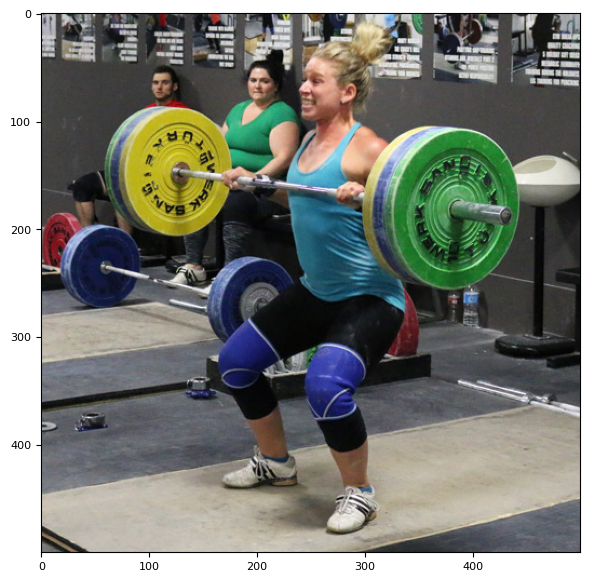

In [147]:
# DISPLAY THE ORIGINAL AND THE GENERATED IMAGES
image = imread(os.path.join(TRAIN_IMAGES,'20.jpg'))
plt.imshow(image)

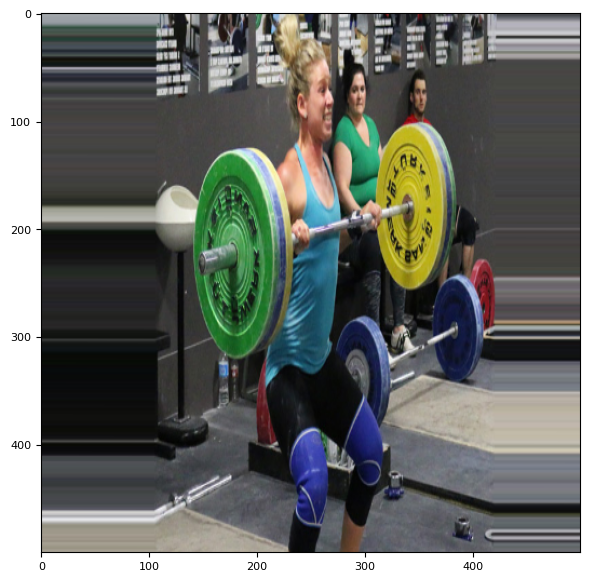

In [148]:
gen_image = image_generator.random_transform(image)
plt.imshow(gen_image)

In [149]:
BATCH_SIZE = 32

train_generator = image_generator.flow_from_dataframe(dataframe=train_df,
                                                      directory=TRAIN_PATH,
                                                      x_col='image',
                                                      y_col='sports',
                                                      subset='training',
                                                      color_mode='rgb',
                                                      batch_size=BATCH_SIZE,
                                                      seed=42,
                                                      shuffle=True,
                                                      class_mode='categorical',
                                                      target_size=(224,224))

train_generator

Found 8832 validated image filenames belonging to 22 classes.


In [158]:
validation_generator = image_generator.flow_from_dataframe(dataframe=train_df,
                                                      directory=TRAIN_PATH,
                                                      x_col='image',
                                                      y_col='sports',
                                                      subset='training',
                                                      color_mode='rgb',
                                                      batch_size=BATCH_SIZE,
                                                      seed=42,
                                                      shuffle=True,
                                                      class_mode='categorical',
                                                      target_size=(224,224))

validation_generator

Found 8832 validated image filenames belonging to 22 classes.


In [150]:
# TEST GENERATOR ... NO SHUFFLE & CLASS MODE SET TO NONE
test_generator = image_generator.flow_from_dataframe(dataframe=test_df,
                                                     directory=TEST_PATH,
                                                     x_col='image',
                                                     y_col=None,
                                                     batch_size=BATCH_SIZE,
                                                     color_mode='rgb',
                                                     seed=42,
                                                     shuffle=False,
                                                     class_mode=None,
                                                     target_size=(224,224))

test_generator

Found 2760 validated image filenames.


#### Construindo o Modelo

In [151]:
## IMPORT THE LIBRARIES
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,AvgPool2D,GlobalMaxPool2D,Flatten,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.callbacks import CSVLogger

In [154]:
trial = 4

In [155]:
base_model = Xception(include_top=False,input_shape=(224,224,3),weights='imagenet')
# mark loaded layers as not trainable
for layer in base_model.layers:
    layer.trainable = False
# add new classification layers
#avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
flat1 = Flatten()(base_model.layers[-1].output)
class1 = Dense(512,activation='relu',kernel_initializer='he_normal')(flat1)
class2 = Dense(256,activation='relu',kernel_initializer='he_normal')(class1)
class3 = Dense(128,activation='relu',kernel_initializer='he_normal')(class2)
output = Dense(22,activation='softmax')(class3)
# define new model
model = Model(inputs=base_model.inputs,outputs=output)
#compile the model
# opt = SGD(lr=0.001,momentum=0.9,nesterov=True)
opt = Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')

print('Transfer Learning based on Xception Module')
model.summary()


83683744/83683744 [==============================] - 4s 0us/step


Transfer Learning based on Xception Module
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                  

In [159]:
# DEFINE THE STEPS_PER_EPOCH
STEP_SIZE_TRAIN = (train_generator.n // train_generator.batch_size)
STEP_SIZE_VALIDATION = (validation_generator.n // validation_generator.batch_size)
STEP_SIZE_TEST = (test_generator.n // test_generator.batch_size)

In [161]:
# DEFINE CALLBACKS ---- > EARLY STOP AND REDUCE LEARNING RATE ON PLATEAU
early_stop = EarlyStopping(patience=9,monitor='val_loss',restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(patience=2,monitor='val_loss',factor=0.1)
csv_logger = CSVLogger('epoch_run_transfer_Xception.csv',separator=',',append=True)

In [ ]:
## FIT THE MODEL
model.fit_generator(generator=train_generator,
                   steps_per_epoch=STEP_SIZE_TRAIN,
                   validation_data=validation_generator,
                   validation_steps=STEP_SIZE_VALIDATION,
                   epochs=10,
                   callbacks=[early_stop,csv_logger]
                   )

<ipython-input-163-306e49cacab4>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_generator,


Epoch 1/10
110/276 [==========>...................] - ETA: 24:22 - loss: 3.0427 - accuracy: 0.1011

In [ ]:
model.evaluate_generator(generator=validation_generator)

In [ ]:
## save the model in a .h5 filename
model.save('sports-predictor.h5')